In [252]:
# Goal: plot HK abudance by taxon

# import relevant packages, etc.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pp
import numpy as np
from axes_style import set_axes_style, set_axes_height


# set standard axes styles
set_axes_style()
figWidth = 5
figHeight = 3

axes_height = 1.5

#save lists of colors
colors = ['#ed7e7e', '#f5e17f', '#6a9fe6', '#8decfc', '#63a68d', '#ce90f0', '#f5ab62', '#fa41a1', '#ce90f0', '#06c961',
         '#95c5db', '#abf5bd', '#e069c1', '#06c961', '#8decfc', '#f5e17f', '#8decfc', '#06c961', '#3980fa', '#95c5db',
         '#f5e17f', '#95c5db']
gray_scale = ['#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4',
              '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4',
              '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4']

In [267]:
def calculate_metrics(taxa_list,data_df,taxon):
    '''Calculates max, min, mean, and range of HK frequency in a specified taxonomic level'''

    metrics_df = pd.DataFrame(index = taxa_list)

    for i in taxa_list:
        metrics_df.at[i,"# of MAGs"] = data_df[taxon].value_counts(dropna=True)[i]
        metrics_df.at[i,"Mean HK_per_100_genes"] = np.mean(data_df["HK_per_100_genes"][data_df[str(taxon)]==i])
        metrics_df.at[i,"Max HK_per_100_genes"] = np.max(data_df["HK_per_100_genes"][data_df[str(taxon)]==i])
        metrics_df.at[i,"Min HK_per_100_genes"] = np.min(data_df["HK_per_100_genes"][data_df[str(taxon)]==i])

    metrics_df["Range HK_per_100_genes"] = metrics_df["Max HK_per_100_genes"] - metrics_df["Min HK_per_100_genes"]

    return metrics_df

In [254]:
# Import data
df1 = pd.read_csv("/Users/emilyfulk/Desktop/DeMMO data/022522_fig3.csv")

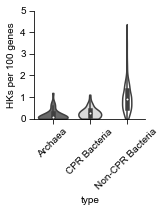

In [255]:
# make violin plot for CPR vs Archaea vs General HKs using Seaborn package 
# scale = count means that the width of the violins is scaled to how many sequences are found at each site/violin
# cut = 0 means that the range of the violin is the range of the observed data (not extending the probability density)

figA = pp.figure(figsize=(3, 3))
ax_HK = pp.subplot(1,1,1)

ax_HK = sns.violinplot(y="HK_per_100_genes", x="type", data=df1, palette=['#696969','#DCDCDC','#FFFFFF'], cut=0)

# set the x axis to cut off at 0
ax_HK.set_ylim(0,5)

# label y axis
ax_HK.set_ylabel("HKs per 100 genes")

# set xtick labels
locs = ax_HK.get_xticks()
ax_HK.set_xticks(locs,labels=['Archaea','CPR Bacteria','Non-CPR Bacteria'],rotation=45)

# remove the right and top borders (but not the axes)
ax_HK.spines['right'].set_visible(False)
ax_HK.spines['top'].set_visible(False)

# Set axes style
set_axes_height(ax_HK,axes_height)

# Export image as svg
fileouta = 'all_violin.svg'
#pp.savefig(fileouta, bbox_inches="tight")

In [268]:
## Parse data
gen = df1[df1["type"] =="gen"]


# trim the number of phyla shown in the plot so it's not as overwhelming.
# Include phyla only if their relative percentage is 0.5% or higher

#calculate relative percentages for all general phyla 
perc = gen["phylum"].value_counts(normalize = True)

#make the percentages into a dataframe and make a list of phyla > 0.5%
gen_perc = pd.DataFrame(data = perc)
gen_perc = gen_perc.reset_index()
gen_perc = gen_perc.rename(columns={"index": "phylum", "phylum": "rel_perc"})
trimmed = gen_perc[gen_perc["rel_perc"] > 0.005]
trimmed_list = trimmed["phylum"].tolist()

# make new dataframe of phyla > 0.5% with all the relevant information
gen_red = gen[gen["phylum"].isin(trimmed_list)]

gen_red

,site,genome,HK_count,gene_count,HK_per_100_genes,type,domain,phylum,class
145,D1,1,69,6215,1.1102,gen,Bacteria,Proteobacteria,Gammaproteobacteria
146,D1,2,28,2992,0.9358,gen,Bacteria,Proteobacteria,Gammaproteobacteria
147,D1,3,17,2823,0.6022,gen,Bacteria,Verrucomicrobiota,Lentisphaeria
148,D1,4,44,2946,1.4936,gen,Bacteria,Proteobacteria,Gammaproteobacteria
149,D1,5,36,5052,0.7126,gen,Bacteria,Proteobacteria,Alphaproteobacteria
...,...,...,...,...,...,...,...,...,...
576,WC,55,4,515,0.7767,gen,Bacteria,Omnitrophota,Omnitrophia
577,WC,56,9,445,2.0225,gen,Bacteria,Proteobacteria,Gammaproteobacteria
578,WC,58,11,966,1.1387,gen,Bacteria,Proteobacteria,Gammaproteobacteria
579,WC,59,4,703,0.5690,gen,Bacteria,Proteobacteria,Gammaproteobacteria


In [265]:
## Calculate states for non-CPR bacteria
# calculate % of bacteria with no HKs
bacteria_no_HKs = len(gen[gen["HK_count"]==0])
all_bacteria = 436
bacteria_perc_no_HKs = (bacteria_no_HKs/all_bacteria)*100
print('% bacteria without HKs:',bacteria_perc_no_HKs)

# Calculate interquartile range (IQR) of all HK frequencies identified in general bacteria
Q1 = np.percentile(gen["HK_per_100_genes"], 25)
Q3 = np.percentile(gen["HK_per_100_genes"], 75)

IQR = Q3 - Q1
high_outlier_cutoff = Q3 + (1.5*IQR)
low_outlier_cutoff = Q1 - (1.5*IQR)


# Find phyla with HK frequencies below 1.5*interquartile range (low outliers)
low_outlier_phyla = gen[gen["HK_per_100_genes"]<low_outlier_cutoff]

# Find phyla with HK frequencies below 1.5*interquartile range (low outliers)
high_outlier_phyla = gen[gen["HK_per_100_genes"]>high_outlier_cutoff]


# find distribution with highest and lowest mean HK frequencies
gen_phyla = list(set(gen_red["phylum"]))

gen_red_stats = calculate_metrics(gen_phyla,gen_red,"phylum")
gen_red_stats
#print("Min mean:",gen_red_stats.idxmin(axis=0),gen_red_stats.min(axis=0))
#print("Max mean:",gen_red_stats.idxmax(axis=0),gen_red_stats.max(axis=0))

% bacteria without HKs: 2.7522935779816518


,# of MAGs,Mean HK_per_100_genes,Max HK_per_100_genes,Min HK_per_100_genes,Range HK_per_100_genes
Omnitrophota,36.0,0.550997,1.2680,0.0000,1.2680
UBA9089,5.0,0.583440,1.3652,0.2888,1.0764
Elusimicrobiota,6.0,0.991600,1.7900,0.0000,1.7900
Firmicutes_E,10.0,0.406940,0.6391,0.2586,0.3805
Bacteroidota,40.0,1.159035,2.9319,0.0668,2.8651
Gemmatimonadota,3.0,0.860300,0.9085,0.7934,0.1151
Acidobacteriota,4.0,0.690825,1.1140,0.4353,0.6787
Firmicutes_D,4.0,0.529025,0.7255,0.2890,0.4365
Firmicutes_B,7.0,0.812371,0.9980,0.6141,0.3839
Desulfobacterota,49.0,1.704439,4.3767,0.6543,3.7224


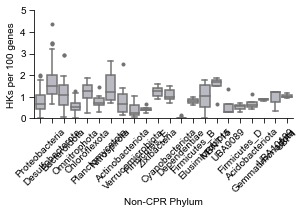

In [258]:
# make box plot for non-CPR bacteria

figB = pp.figure(figsize=(7, 3))
ax_HK3 = pp.subplot(1,1,1)

# save list of phyla
phyla_order=["Proteobacteria", "Desulfobacterota","Bacteroidota","Omnitrophota","Chloroflexota",
                           "Planctomycetota","Nitrospirota","Actinobacteriota","Verrucomicrobiota","Firmicutes_E",
                           "Zixibacteria","Cyanobacteriota","Dependentiae","Firmicutes_B","Elusimicrobiota","MBNT15",
                           "UBA9089","Firmicutes_D","Acidobacteriota","Gemmatimonadota","UBA10199","UBP1"]

ax_HK3 = sns.boxplot(y="HK_per_100_genes", x="phylum", data=gen_red,
                     order=phyla_order, palette = gray_scale,
                    flierprops = dict(marker = 'o', markersize = 3))
            
# set the y axis limits
ax_HK3.set_ylim(0,5)

# label axes if not labeled already
ax_HK3.set_ylabel("HKs per 100 genes")
ax_HK3.set_xlabel("Non-CPR Phylum")

locs = ax_HK3.get_xticks()
ax_HK3.set_xticks(locs,labels=phyla_order,rotation=45)

# remove the right and top borders (but not the axes)
ax_HK3.spines['right'].set_visible(False)
ax_HK3.spines['top'].set_visible(False)

set_axes_height(ax_HK3,axes_height)
fileoutb = 'bacteria_boxplot.svg'

#pp.savefig(fileoutb, bbox_inches="tight")

,# of MAGs,Mean HK_per_100_genes,Max HK_per_100_genes,Min HK_per_100_genes,Range HK_per_100_genes
ABY1,25.0,0.189940,0.9195,0.0000,0.9195
Gracilibacteria,9.0,0.398344,0.8612,0.0894,0.7718
Microgenomatia,18.0,0.164744,0.7338,0.0000,0.7338
Kazan,1.0,0.146600,0.1466,0.1466,0.0000
Paceibacteria,46.0,0.352928,1.1125,0.0000,1.1125
WWE3,1.0,0.773700,0.7737,0.7737,0.0000
Berkelbacteria,3.0,0.396133,0.5382,0.1145,0.4237
Dojkabacteria,1.0,0.414900,0.4149,0.4149,0.0000


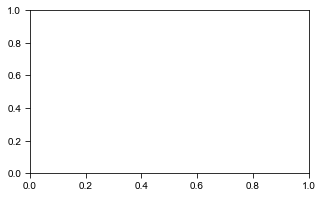

In [274]:
figC = pp.figure(figsize=(figWidth, figHeight))
ax_HK4 = pp.subplot(1,1,1)

cpr = df1[df1["type"] =="cpr"].dropna()
cpr_list = list(set(cpr["class"]))

cpr_perc = cpr["class"].value_counts(normalize = True)

cpr_stats = calculate_metrics(cpr_list,cpr,"class")
cpr_stats

In [ ]:
# make the CPR class plot
# color = ['#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4', '#b9b9c4']

cpr_order = ["Paceibacteria","ABY1","Microgenomatia", "Gracilibacteria", "Berkelbacteria","Dojkabacteria","WWE3","Kazan"]

ax_HK4 = sns.boxplot(y="HK_per_100_genes", x="class", data=cpr, order=cpr_order,
                    color = '#b9b9c4', flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'black', 
                                                      markeredgecolor = 'black'))


# set the y axis limits
ax_HK4.set_ylim(0,5)

# label axes
ax_HK4.set_ylabel("HKs per 100 genes")
ax_HK4.set_xlabel("CPR class")

locs = ax_HK4.get_xticks()
ax_HK4.set_xticks(locs,labels=cpr_order,rotation=45)

# remove the right and top borders (but not the axes)
ax_HK4.spines['right'].set_visible(False)
ax_HK4.spines['top'].set_visible(False)

# set axes style and save figure
set_axes_height(ax_HK4,axes_height)
fileoutc = 'CPR_boxplot.svg'
#pp.savefig(fileoutc, bbox_inches="tight")

cpr_no_HKs = len(cpr[cpr["HK_count"]==0])
all_cpr = 105
cpr_perc_no_HKs = (cpr_no_HKs/all_cpr)*100
print('% cpr without HKs:',cpr_perc_no_HKs)

,# of MAGs,Mean HK_per_100_genes,Max HK_per_100_genes,Min HK_per_100_genes,Range HK_per_100_genes
Iainarchaeia,6.0,0.015467,0.0928,0.0000,0.0928
CG49143,4.0,0.146350,0.2627,0.0000,0.2627
Thermoplasmata_A,3.0,0.692333,0.7747,0.5931,0.1816
Methanosarcinia,2.0,0.418650,0.5144,0.3229,0.1915
Methanobacteria,1.0,0.582200,0.5822,0.5822,0.0000
Micrarchaeia,8.0,0.114725,0.2455,0.0000,0.2455
YNP-45,2.0,0.170100,0.2528,0.0874,0.1654
JdFR-18,2.0,0.160500,0.3210,0.0000,0.3210
E2,1.0,1.192800,1.1928,1.1928,0.0000
Woesearchaeia,11.0,0.063573,0.1222,0.0000,0.1222


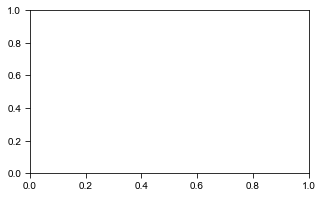

In [272]:
figD = pp.figure(figsize=(figWidth, figHeight))
ax_HK5 = pp.subplot(1,1,1)


arch = df1[df1["type"] =="arch"]
arch_list = list(set(arch["class"]))

arch_perc = arch["class"].value_counts(normalize = True)

archaea_stats = calculate_metrics(arch_list,arch,"class")
archaea_stats


In [ ]:
archaea_order = ["Woesearchaeia","Micrarchaeia","Iainarchaeia","CG49143","Thermoplasmata_A","YNP-45","Methanosarcinia","JdFR-18","Methanobacteria","E2"]
# make the archaea class plot
ax_HK5 = sns.boxplot(y="HK_per_100_genes", x="class", data=arch, order=archaea_order,
                    color = '#b9b9c4', flierprops = dict(marker = 'o', markersize = 3, markerfacecolor = 'black', 
                                                      markeredgecolor = 'black'))


# set y axis limits
ax_HK5.set_ylim(0,5)

# label axes
ax_HK5.set_ylabel("HKs per 100 genes")
ax_HK5.set_xlabel("Archaea class")

locs = ax_HK5.get_xticks()
ax_HK5.set_xticks(locs,labels=archaea_order,rotation=45)

# remove the right and top borders (but not the axes)
set_axes_height(ax_HK5,2)
ax_HK5.spines['right'].set_visible(False)
ax_HK5.spines['top'].set_visible(False)
set_axes_height(ax_HK5, axes_height)
fileoutd = 'archaea_boxplot.svg'
#pp.savefig(fileoutd, bbox_inches="tight")

archaea_no_HKs = len(arch[arch["HK_count"]==0])
all_archaea = 40
archaea_perc_no_HKs = (archaea_no_HKs/all_archaea)*100
print('% archaea without HKs:',archaea_perc_no_HKs)